# Simple-LaMa example usage

### Step 0: Install stuffs

In [1]:
!pip install numpy torch

### Step 1: Prepare your image

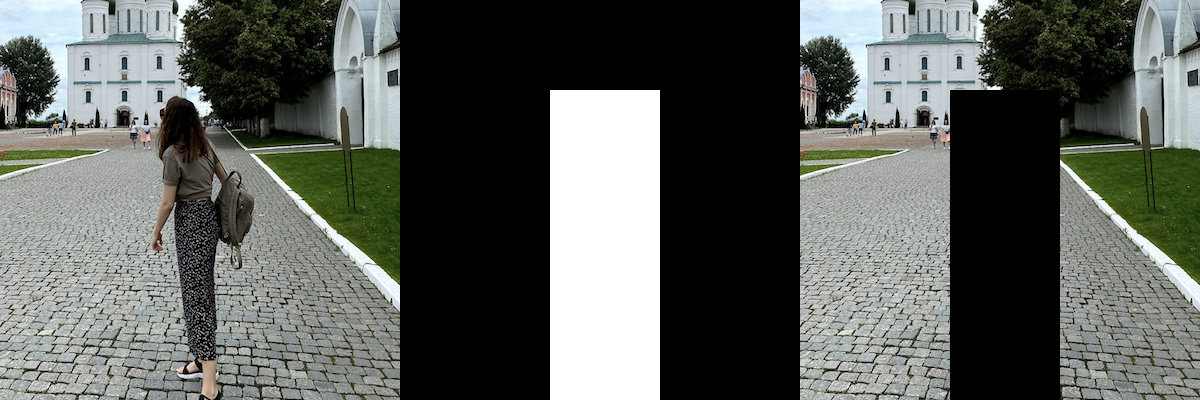

In [2]:
from PIL import Image
import numpy as np

image = Image.open('img.png')
mask = Image.open('mask.png')

image_np = np.array(image)[..., :3]
mask_np = np.array(mask)
masked = (image_np * (1 - mask_np[..., np.newaxis] / 255.0)).astype(np.uint8)

to_display = Image.new('RGB', (image.size[0] * 3, image.size[1]))
to_display.paste(image, (0, 0))
to_display.paste(mask.convert('RGB'), (image.size[0], 0))
to_display.paste(Image.fromarray(masked.astype(np.uint8)), (image.size[0] * 2, 0))
display(to_display)

### Step 2: Load your LaMa

In [3]:
from lama import LaMa

model = LaMa('cuda')

### Step 3: Inpaint!

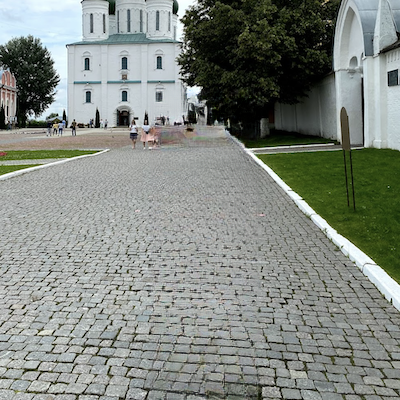

In [4]:
lama_image = model(masked, mask_np)

display(Image.fromarray(lama_image))